In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Loan Status.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

Firstly need to check the missing value 

In [8]:
df.duplicated().sum()

0

Dataset does not contain any duplicate so we are yes to go

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


SO we have 614 rows and 13 columns including Target Variable

Target Variable is 'Loan_Status'

Three datatype :float64(4),int64(1),object(8)

# Missing Value check

<AxesSubplot:>

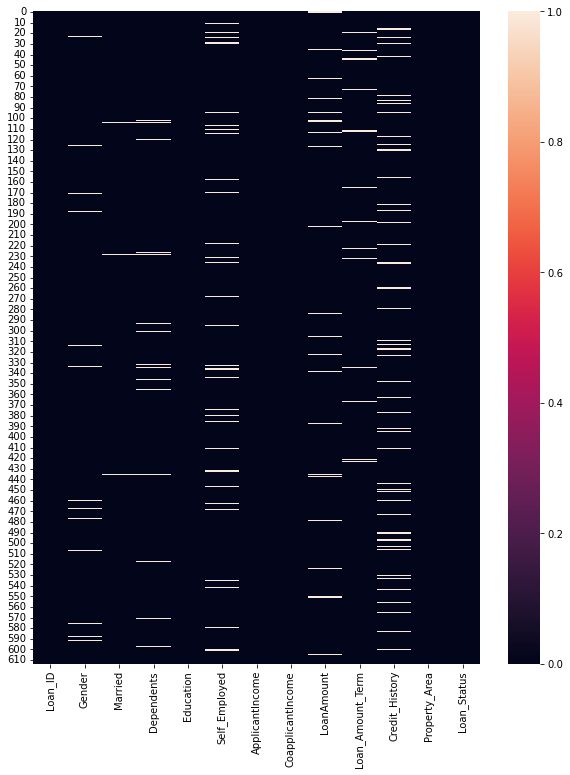

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull())

In [11]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(df))*100
print(pd.concat([missing_values,percentage_missing_values],axis=1,keys=['Missing_Values','% Missing data']))

                   Missing_Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


7 out of 13 columns contain missing values

Small amount of data is missing so we use mean and mode to replace with NaN values

In [12]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


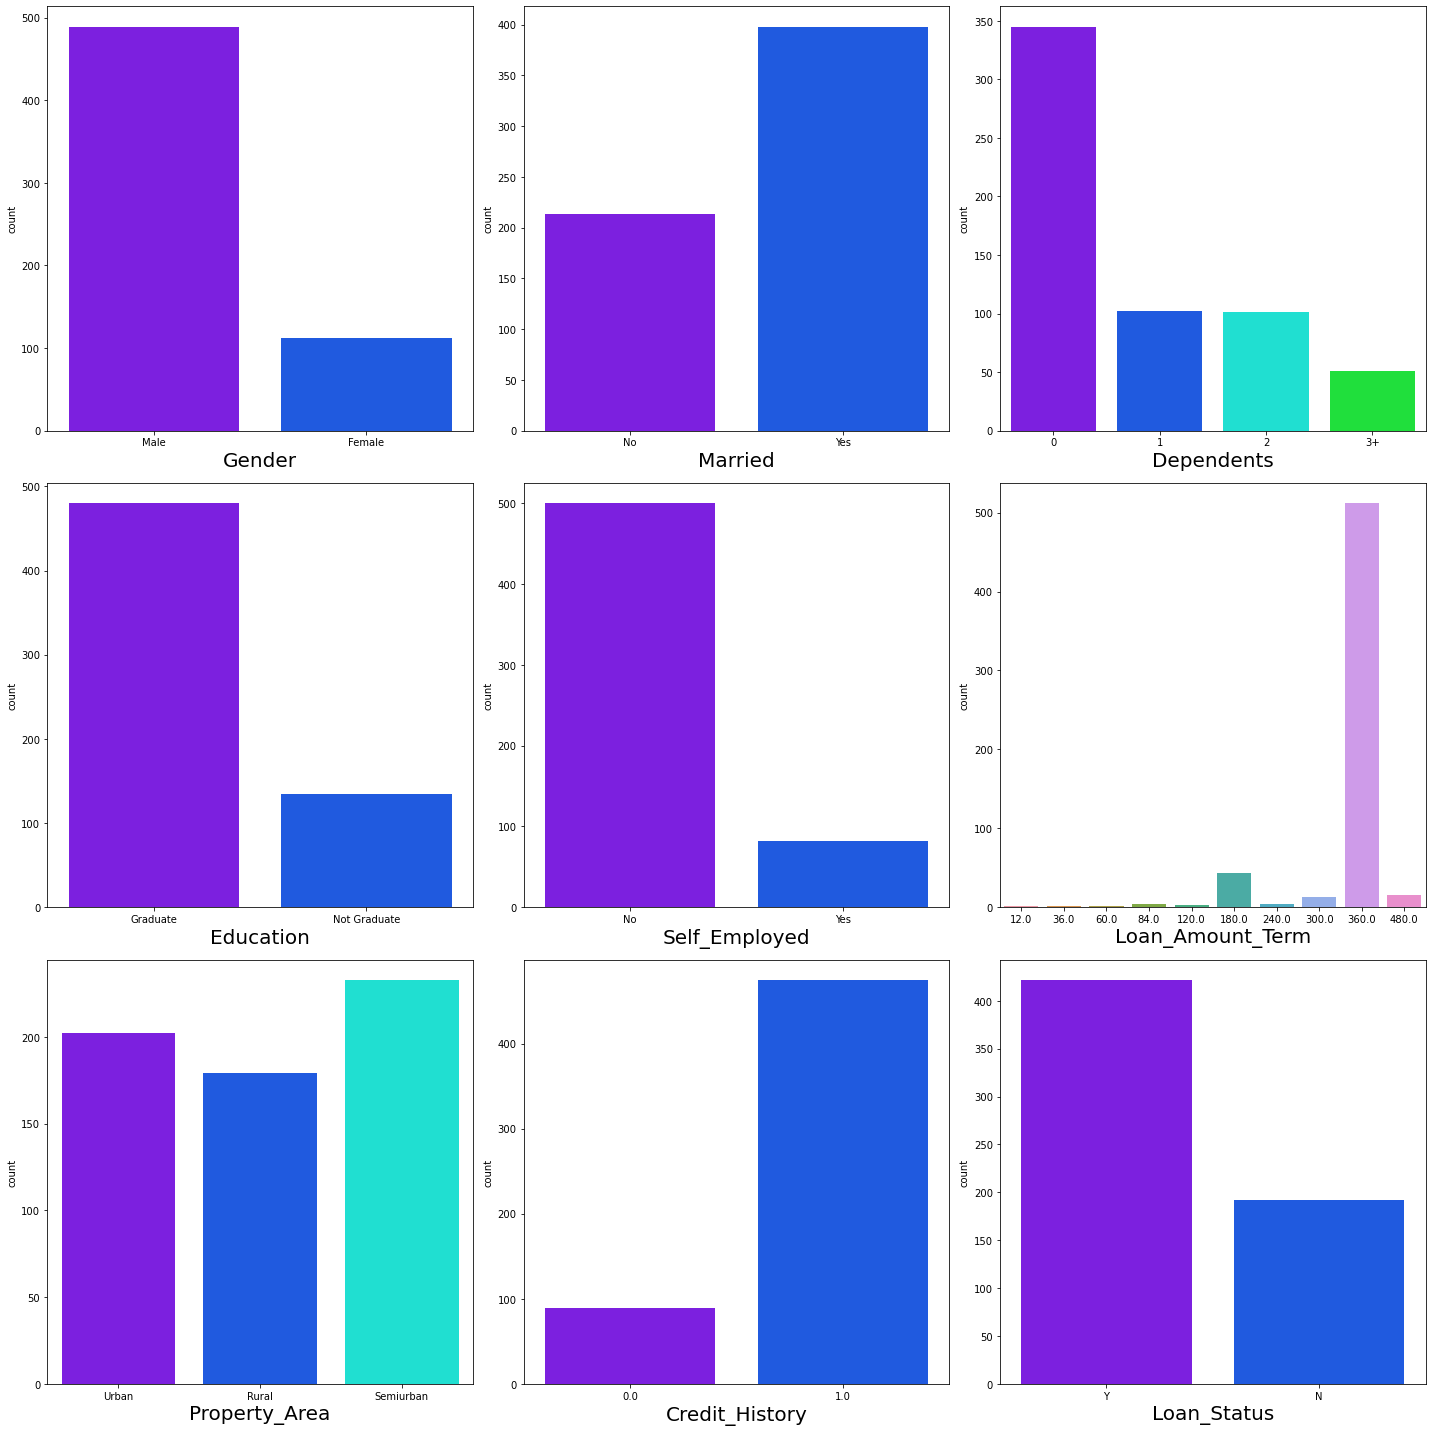

In [13]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.tight_layout()
plt.show()

Out of total loan application 80% are male

only 20% are self employed

70% are married and 75% of loan applicants are graduate

60% applicants have no dependents

80% have previous credit history

70 % applicants get loan approved

# Checking of outliers of Missing Value

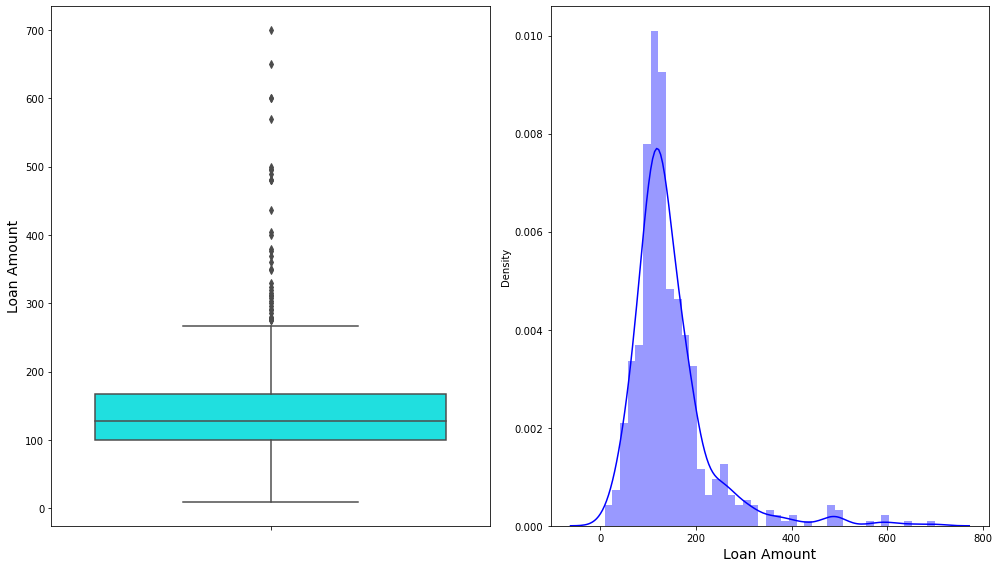

In [14]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.boxplot(y='LoanAmount',data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=14)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'],color='b')
plt.xlabel('Loan Amount',fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
print("Mean of Loan Amount :",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount : 146.41216216216216
Median of Loan Amount: 128.0


The Mean is Greater than Median loan

Clearly we can see outliers in boxplot also 

In [16]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Missing Value Check after imputation



In [17]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(df))*100
print(pd.concat([missing_values,percentage_missing_values],axis=1,keys=['Missing Values','% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0



Finally No Missing Value

<AxesSubplot:>

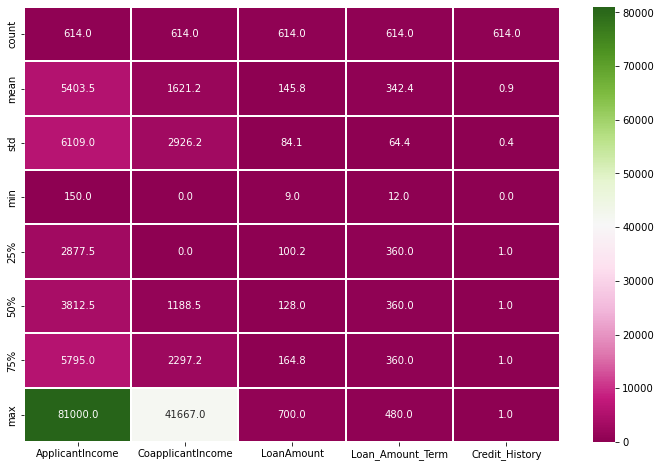

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True,cmap='PiYG')

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In Applicant Income & Co applicant income the std.deviation is higher than median so data is spread and skewed

MInimum Tenure of Loan is 12 years and Maximum is 480 Months

Minimum Applicant income is 150 and max is 81000

# Target Variable

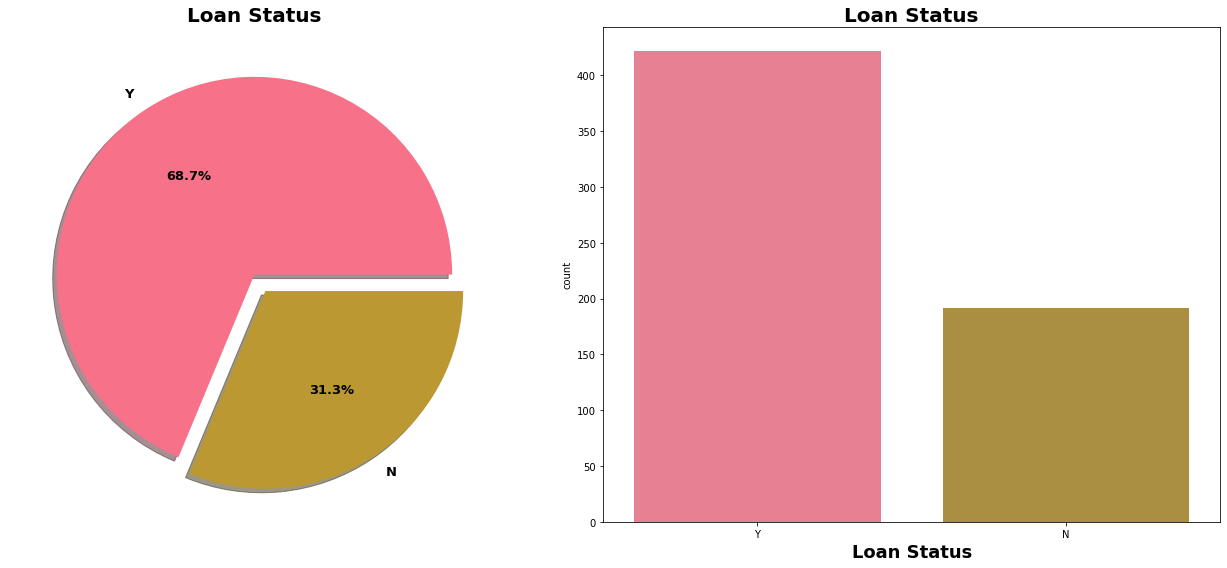

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

68.7% Applicant get loan approval

we can see dataset is imbalance

# Gender vs Loan Status

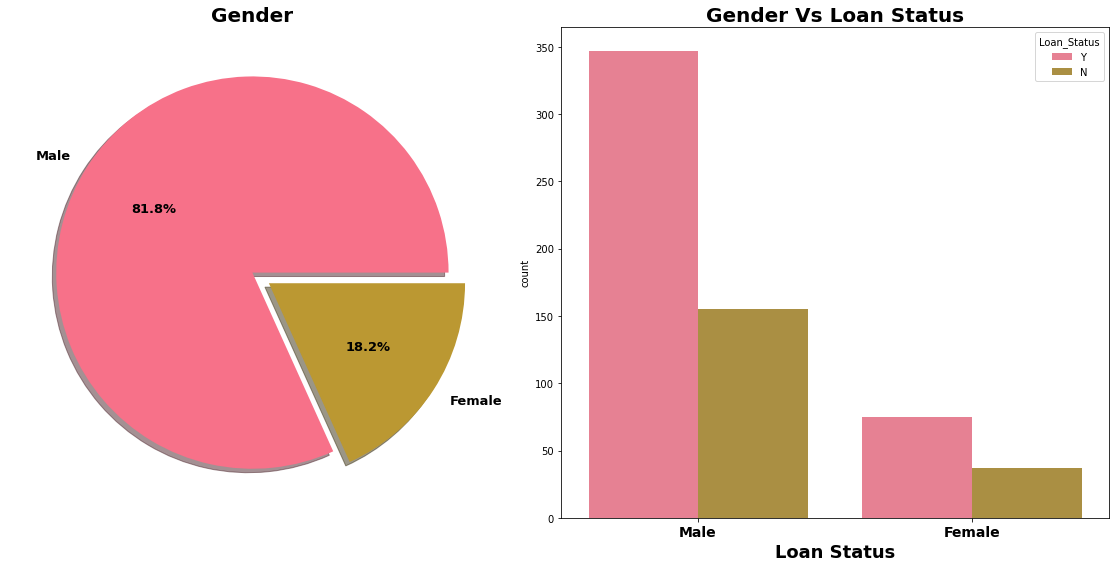

In [21]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                    textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
pd.crosstab(df['Gender'],df["Loan_Status"],margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


81.8% Applicant are Male

65% Applicant from each gender gets loan approval so gender does not play any role in approval

# Married Vs Loan Status

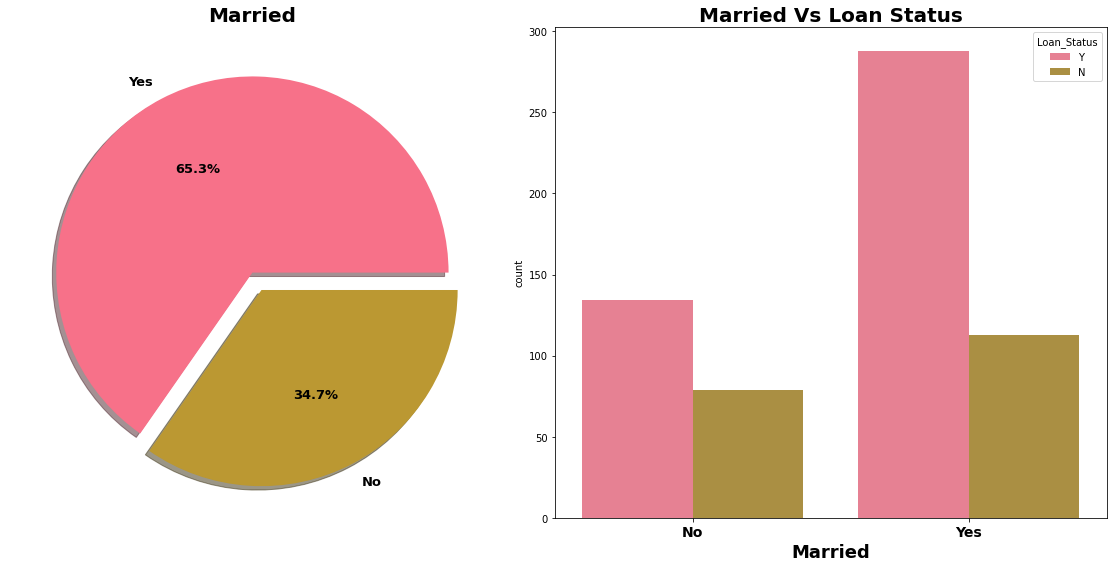

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [24]:
pd.crosstab([df['Gender'],df["Married"]],[df.Loan_Status],margins=True).style.background_gradient(cmap='summer_r')

65.3% applicants are married .Married people have possiblity of getting loan is high

# Education Vs Loan status

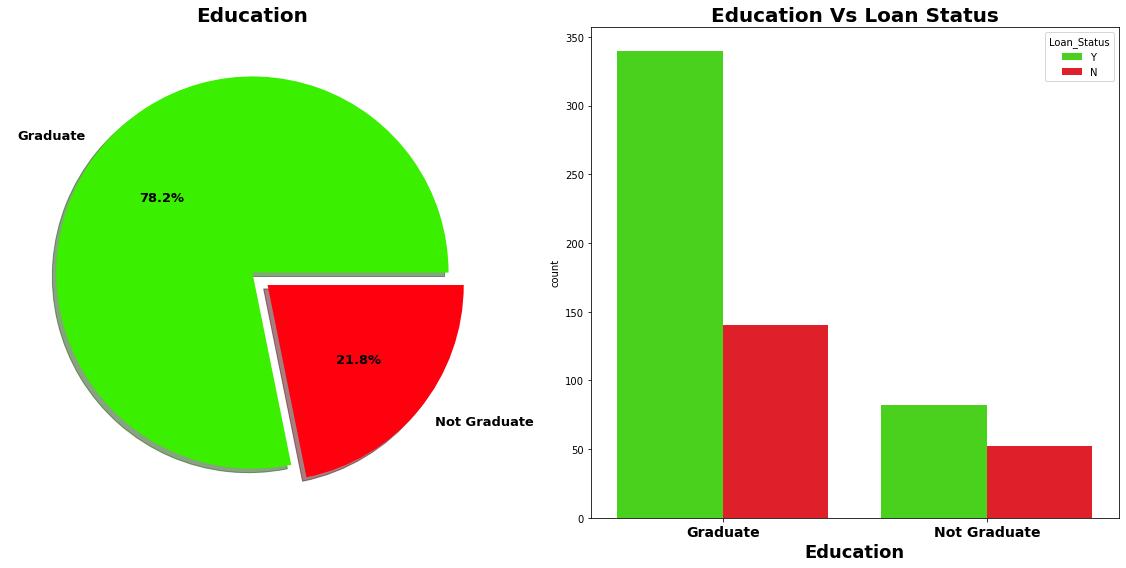

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [26]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status], margins = True).style.background_gradient(cmap='summer_r')

Graduate applicant more likely to get Loan irrrespective of gender

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [28]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Category:
    df[i]=le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [30]:
Numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

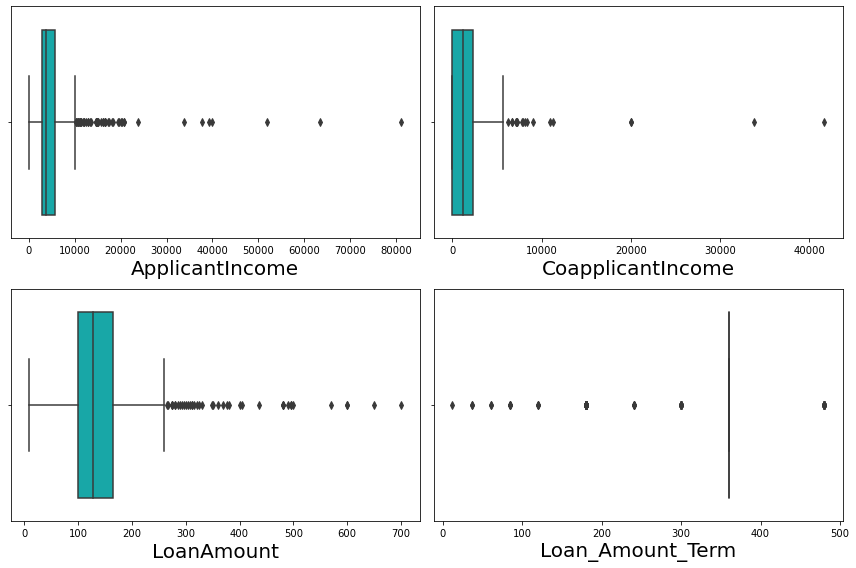

In [31]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1
for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From Boxplot we can see outliers exist

In [32]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [33]:
df['Dependents']=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [34]:
df['Dependents']=pd.to_numeric(df['Dependents'])

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [37]:
print("Shape of the dataframe before removing outliers:",df.shape)
print("Shape of the dataframe after removing outliers:",df1.shape)
print("Percentage of dataloss post outlier removal:",(df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers: (614, 12)
Shape of the dataframe after removing outliers: (577, 12)
Percentage of dataloss post outlier removal: 6.026058631921824


Data Loss

In [38]:
print("\033[1m"+'Percentage Data Loss:'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss: 6.026058631921824 %


Loss of 6.02% of data is acceptable

# Skewness

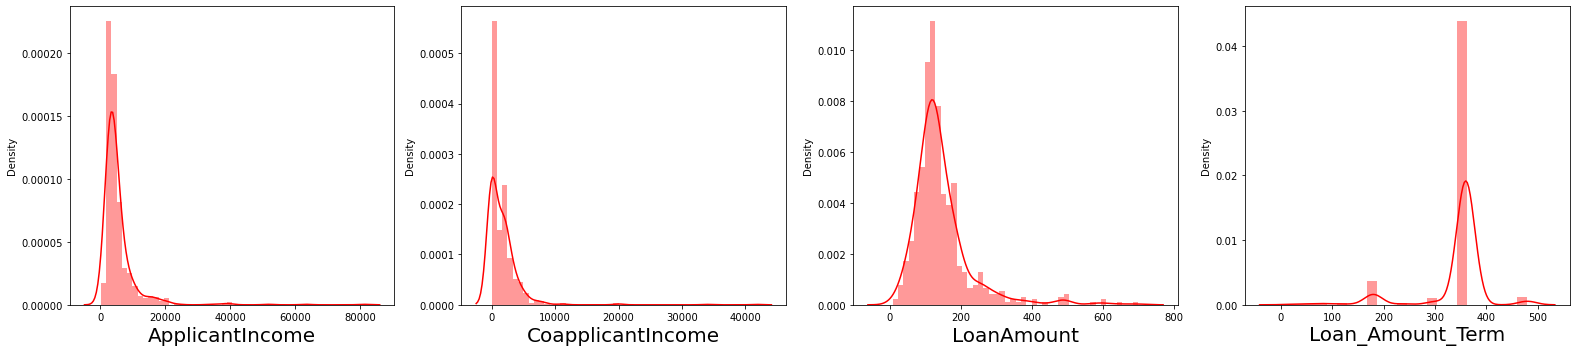

In [39]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [40]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.
We will yeo-johnson transformation method.

In [41]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[skew]=scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931


In [43]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness is with in permissible limit

so we are yes to go

In [44]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.087227,0.219590,0.142137,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.016968,0.312596,0.179350,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.111770,-0.002021,0.158592,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.178206,0.038406,-0.149533,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.185468,-0.089864,0.111002,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.087227,0.016968,0.111770,-0.178206,0.185468,1.000000,-0.367287,0.483447,-0.030586,0.012667,-0.029386,0.013568
CoapplicantIncome,0.219590,0.312596,-0.002021,0.038406,-0.089864,-0.367287,1.000000,0.136998,0.012502,0.007486,-0.055421,0.056869
LoanAmount,0.142137,0.179350,0.158592,-0.149533,0.111002,0.483447,0.136998,1.000000,0.081971,-0.016884,-0.092640,-0.038533
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.030586,0.012502,0.081971,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.012667,0.007486,-0.016884,-0.004705,1.000000,0.001963,0.540556


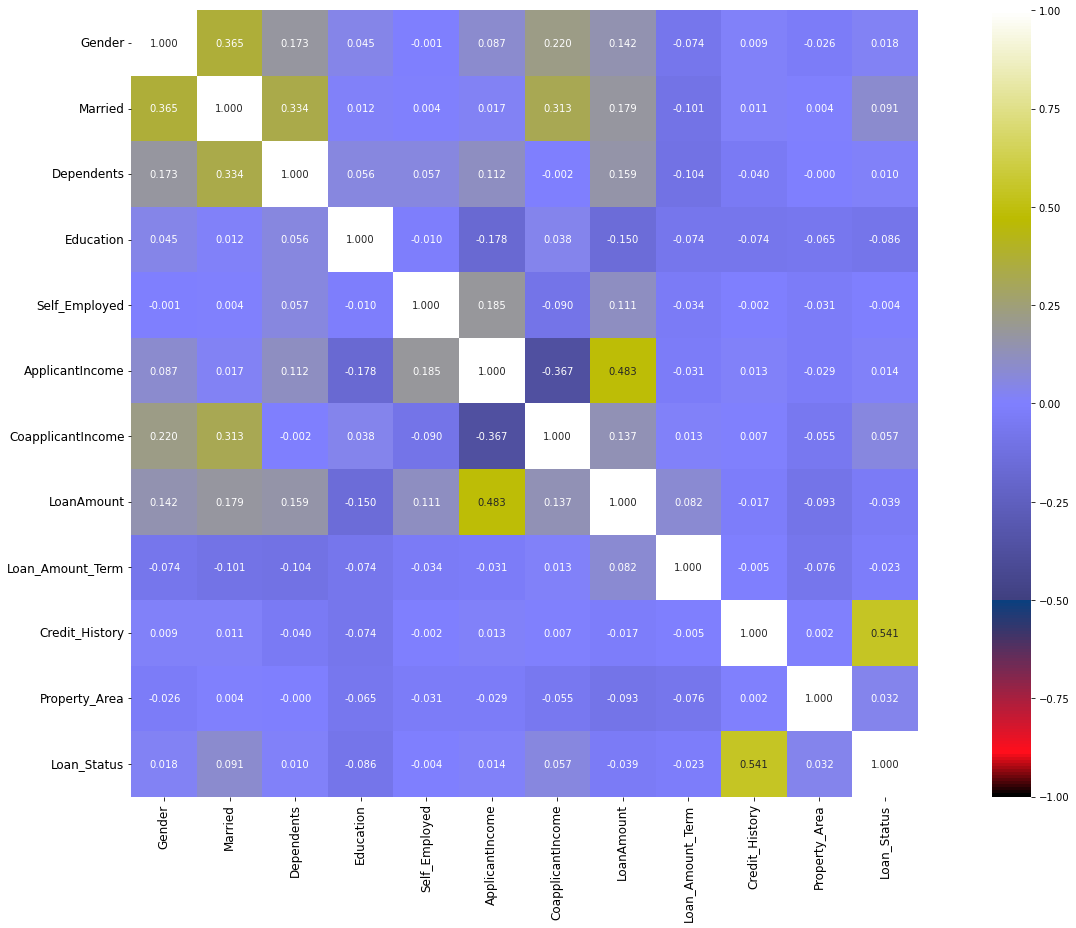

In [45]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

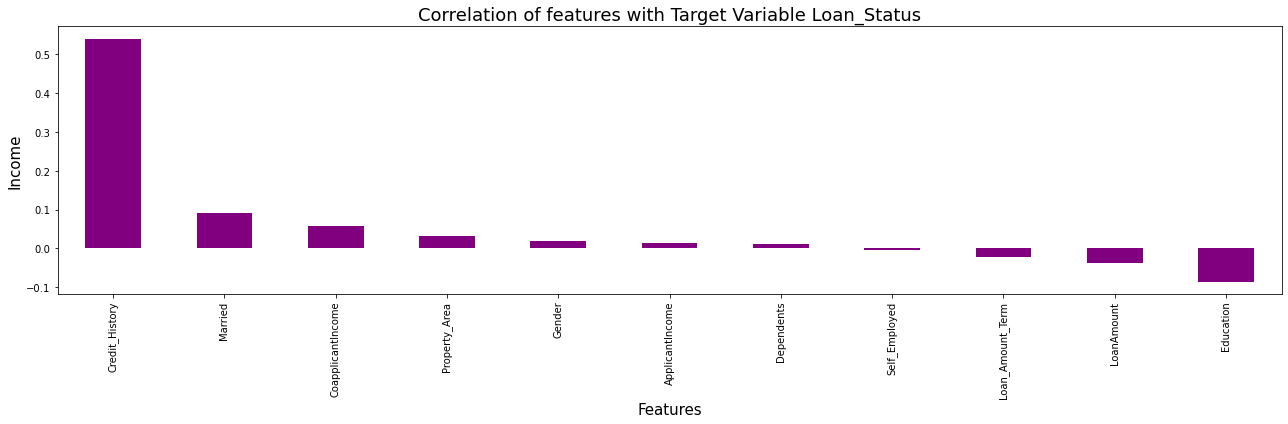

In [46]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

Max correlation exist betweem 0.541 credit history and loan status

In [47]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (429, 11)
Training target vector size: (429,)
Test feature matrix size: (185, 11)
Test target vector size: (185,)


# Finding Best Random State

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8648648648648649 on Random_state 8


# Logistic Regression Model

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,random_state=8,test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression:'+'\033[0m',accuracy_score(Y_test,y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression:'+'\033[0m\n',confusion_matrix(Y_test,y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m\n',classification_report(Y_test,y_pred))
      

Logistics Regression Evaluation


Accuracy Score of Logistics Regression: 0.8648648648648649


Confusion matrix of Logistics Regression:
 [[ 28  24]
 [  1 132]]


classification Report of Logistics Regression
               precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185



# Finding Optimal value of n_neighbour for KNN

In [58]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

    

In [60]:
rmse_val=[]
for K in range(25):
    K=K+1
    model=neighbors.KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error=sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k=',K,'is:',error)

RMSE value for k= 1 is: 0.5599227745979918
RMSE value for k= 2 is: 0.6062735088782683
RMSE value for k= 3 is: 0.4532167311622613
RMSE value for k= 4 is: 0.47647353234678946
RMSE value for k= 5 is: 0.3959251908590268
RMSE value for k= 6 is: 0.4026936331284146
RMSE value for k= 7 is: 0.3890390100637099
RMSE value for k= 8 is: 0.4026936331284146
RMSE value for k= 9 is: 0.37488737047350706
RMSE value for k= 10 is: 0.36760731104690386
RMSE value for k= 11 is: 0.37488737047350706
RMSE value for k= 12 is: 0.36760731104690386
RMSE value for k= 13 is: 0.382028723980208
RMSE value for k= 14 is: 0.36760731104690386
RMSE value for k= 15 is: 0.37488737047350706
RMSE value for k= 16 is: 0.37488737047350706
RMSE value for k= 17 is: 0.37488737047350706
RMSE value for k= 18 is: 0.36760731104690386
RMSE value for k= 19 is: 0.37488737047350706
RMSE value for k= 20 is: 0.37488737047350706
RMSE value for k= 21 is: 0.37488737047350706
RMSE value for k= 22 is: 0.37488737047350706
RMSE value for k= 23 is: 0.3

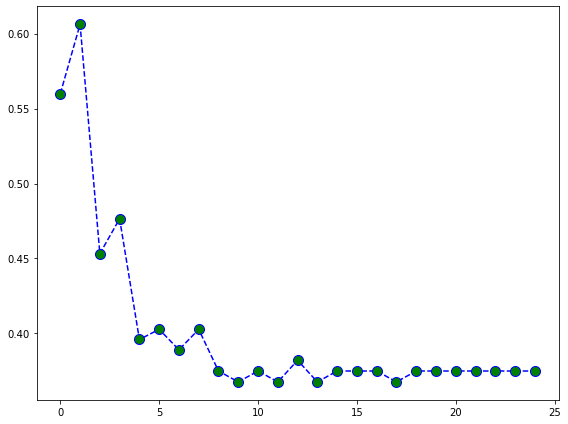

In [65]:
plt.figure(figsize=(8,6))
plt.plot(range(25),rmse_val,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)

At k=3 ,we get minimum RMSE value which approximately 0.45321673116226613,we can safely say that k-3 will give us best results

# Applying other classification algoritm

In [66]:
from sklearn.metrics import plot_roc_curve

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8648648648648649


Confusion matrix:
 [[ 28  24]
 [  1 132]]


Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185





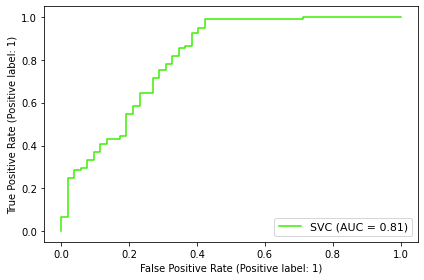

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8648648648648649


Confusion matrix:
 [[ 28  24]
 [  1 132]]


Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185





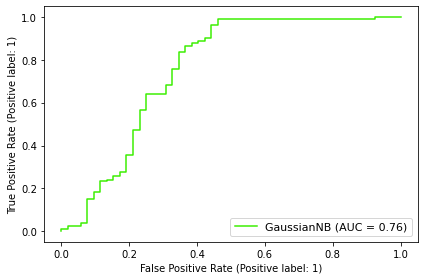

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7027027027027027


Confusion matrix:
 [[ 29  23]
 [ 32 101]]


Classification Report :
               precision    recall  f1-score   support

           0       0.48      0.56      0.51        52
           1       0.81      0.76      0.79       133

    accuracy                           0.70       185
   macro avg       0.64      0.66      0.65       185
weighted avg       0.72      0.70      0.71       185





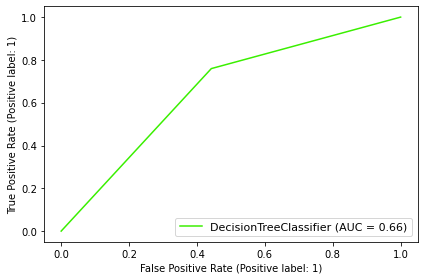

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7945945945945946


Confusion matrix:
 [[ 24  28]
 [ 10 123]]


Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.46      0.56        52
           1       0.81      0.92      0.87       133

    accuracy                           0.79       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.78      0.79      0.78       185





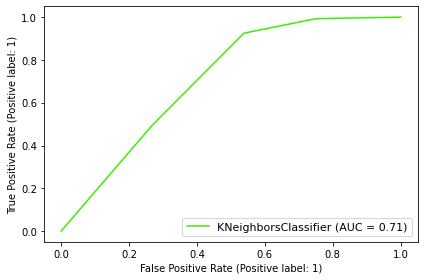

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8378378378378378


Confusion matrix:
 [[ 30  22]
 [  8 125]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        52
           1       0.85      0.94      0.89       133

    accuracy                           0.84       185
   macro avg       0.82      0.76      0.78       185
weighted avg       0.83      0.84      0.83       185





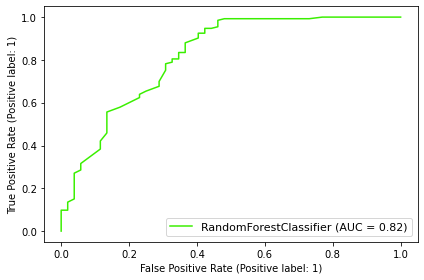

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8054054054054054


Confusion matrix:
 [[ 30  22]
 [ 14 119]]


Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.58      0.62        52
           1       0.84      0.89      0.87       133

    accuracy                           0.81       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.80      0.81      0.80       185





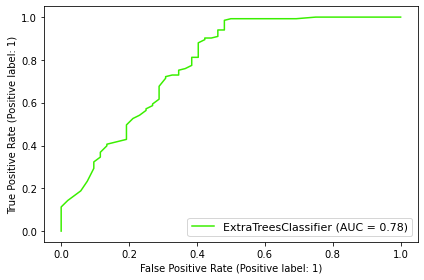

In [72]:
model=[
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n',accuracy_score(Y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix:'+'\033[0m\n',confusion_matrix(Y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m\n',classification_report(Y_test,y_pred))
    print('\n')
    disp=plot_roc_curve(m,X_test,Y_test)
    plt.legend(prop={'size':11},loc='lower right')
    plt.show()
    print('==============================================================================================')

# CrossValidation

In [73]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
      SVC(),
      GaussianNB(),
      DecisionTreeClassifier(),
      KNeighborsClassifier(n_neighbors =3),
      RandomForestClassifier(),
      ExtraTreesClassifier()]

for m in model:
    score=cross_val_score(m,X_scale,Y,cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',m,':'+'\033[0m\n')
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("std deviation:",score.std())
    print('\n')
    print('====================================================================================')



Cross Validation Score LogisticRegression() :

Score: [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
Mean Score: 0.809462881514061
std deviation: 0.027383073694490688




Cross Validation Score SVC() :

Score: [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean Score: 0.8078368652538984
std deviation: 0.02923416378093254




Cross Validation Score GaussianNB() :

Score: [0.79674797 0.7804878  0.7804878  0.84552846 0.81967213]
Mean Score: 0.8045848327335733
std deviation: 0.025007026056597794




Cross Validation Score DecisionTreeClassifier() :

Score: [0.75609756 0.66666667 0.72357724 0.7398374  0.7295082 ]
Mean Score: 0.723137411701986
std deviation: 0.030314967876624417




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score: [0.76422764 0.75609756 0.73170732 0.7804878  0.71311475]
Mean Score: 0.7491270158603225
std deviation: 0.023918383759043503




Cross Validation Score RandomForestClassifier() :

Score: [0.79674797 0.74796748 0.7804878  0.8

we can see Random Forest Classifier () gives us good accuracy and f1 score so we will use as it as a final model

# Hyper Parameter Tuning:GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameter={'bootstrap':[True],'max_depth':[5,10,20,40,50,60],
          'max_features':['auto','log2'],'criterion':['gini','entropy'],
          'n_estimators':[5,10,15,25,50,60,70]}

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.721 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.744 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [94]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 25}

# Final Model

In [101]:
Final_mod=RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=25,max_depth=5,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n',accuracy_score(Y_test,y_pred))

Accuracy Score :
 0.8540540540540541


In [102]:
from sklearn.metrics import plot_roc_curve

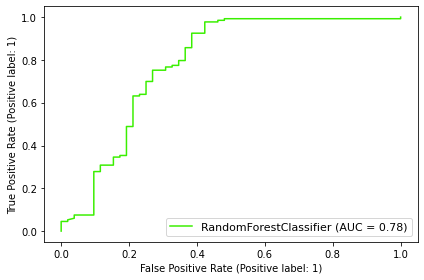

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.7520965876229033


In [103]:
disp=plot_roc_curve(Final_mod,X_test,Y_test)
plt.legend(prop={'size':11},loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(Y_test,Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)